# Lab Ex 2: ODE Models
Zarek McGee  
05/13/2018
________________________________________
### Level 1 #1: Exponential Growth & Decay

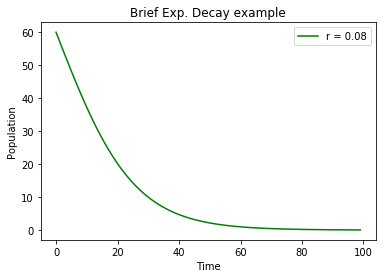

In [2]:
#First, here is a basic model based on example code
#from the lab instructions and lecture material

import matplotlib.pyplot as plt
from scipy.integrate import odeint

#this function returns dN/dt
def model(y,times,r,k):
    N = y[0]
    dN = r * N * (1 - N / float(k))
    return [dN]

#initial value N(0)
y = [60]

#growth rate and max carrying capacity
params = (-.08, 120)

times = range(0,100)
out = odeint(func=model,y0=y,t=times,args=params)


# plot results
plt.plot(times,out,'g',label='r = 0.08')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Brief Exp. Decay example')
plt.legend()
plt.show()

_______________________________________________________
Now let's suppose we want to model the population growth of 3 hypothetical islands where:  
* Island A has only humans with r=0.017, k=100,000
* Island B has only rabbits with r=0.19, k=500,000
* Island C has only penguins with r=0.09, k=300,000

Suppose each island starts with 30,000 of its respective animals and we want to see where each population ends up in 100 years. (Assume no predators and ample food supply).

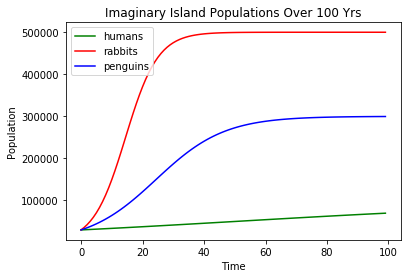

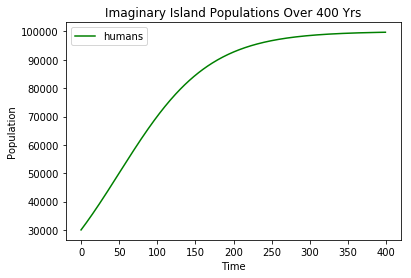

In [9]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#this function returns dN/dt
def model(y,times,r,k):
    N = y[0]
    dN = r * N * (1 - N / float(k))
    return [dN]

#initial value N(0)
y = [30000]

#growth rate and max carrying capacity
paramsA = (.017, 100000)
paramsB = (.19, 500000)
paramsC = (.09, 300000)

times = range(0,100)

#Calculate ODEs
outA = odeint(func=model,y0=y,t=times,args=paramsA)
outB = odeint(func=model,y0=y,t=times,args=paramsB)
outC = odeint(func=model,y0=y,t=times,args=paramsC)

# plot 100 years
plt.plot(times,outA,'g',label='humans')
plt.plot(times,outB,'r',label='rabbits')
plt.plot(times,outC,'b',label='penguins')
plt.title('Imaginary Island Populations Over 100 Yrs')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

#Let's also plot the results for Island A over 400 years
altTimes = range(0,400)
alt_outA = odeint(func=model,y0=y,t=altTimes,args=paramsA)

plt.plot(altTimes,alt_outA,'g',label='humans')
plt.title('Imaginary Island Populations Over 400 Yrs')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

As you can see, it appears the 30,000 humans on Island A has grown to a population of about 70,000 after 100 years, but have not reached the carrying capacity of the island. The second plot shows that this occurs The rabbits on Island B reached their threshhold just before 40 years had past, and the penguins on Island C reached theirs around 80 years.

### Level 2 #2 SIR

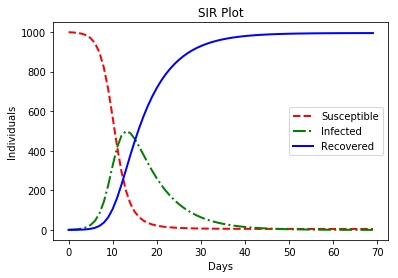

          S(t)        I(t)        R(t)  times
0   999.000000    1.000000    0.000000      0
1   997.875606    1.913241    0.211154      1
2   995.729251    3.655863    0.614887      2
3   991.645696    6.968886    1.385418      3
4   983.925478   13.223656    2.850866      4
5   969.502741   24.877607    5.619652      5
6   943.147661   46.065103   10.787236      6
7   896.873651   82.906389   20.219960      7
8   821.025761  142.186685   36.787555      8
9   709.588587  226.273395   64.138018      9
10  569.298894  325.260631  105.440474     10
11  422.610029  416.082793  161.307178     11
12  295.005221  476.289458  228.705321     12
13  199.270634  498.462317  302.267049     13
14  133.999832  489.328373  376.671795     14
15   91.561162  460.361166  448.077672     15
16   64.321669  421.392419  514.285912     16
17   46.696735  378.975667  574.327597     17
18   35.072644  336.927357  627.999998     18
19   27.219888  297.253819  675.526293     19
20   21.778655  260.879267  717.34

In [116]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

#This function defines our equations for dS/dt, dI/dt, and dR/dt
def modelSIR(y0, times, N, beta, gamma):
    S, I, R = y0
    dS = (-beta * I * S) / N
    dI = (beta * I * S) / N - gamma * I
    dR = gamma * I
    return [dS, dI, dR]

#Initial Conditions
N = 1000
I = 1
R = 0
S = N - (I + R)

y0 = (S, I, R)

#parameters are N=population, beta=contact rate, gamma=recovery rate
params = (1000, 0.8, 0.15)

#An array of timesteps
times = [x for x in range(0, 70)]

#Calculate ODEs and store in a dataframe
out = odeint(modelSIR, y0, times, args=params)
#Note: I use 'R(t)' vs. 'R' because 'R' is ambiguous when plotting
df_columns = ['S(t)', 'I(t)', 'R(t)']
df = pd.DataFrame(out, columns=df_columns)
df['times'] = times

# Plot the S(t), I(t), and R(t) columns of the dataframe over times
plt.plot('times', 'S(t)', data=df, color='r', linestyle='--', linewidth=2, label='Susceptible')
plt.plot('times', 'I(t)', data=df, color='g', linestyle='-.', linewidth=2, label='Infected')
plt.plot('times', 'R(t)', data=df, color='b', linewidth=2, label='Recovered')
plt.title('SIR Plot')
plt.xlabel('Days')
plt.ylabel('Individuals')
plt.legend(loc='center right')
plt.show()

print(df)

Summary:  
Implementing the SIR model was much more difficult than Exp. growth/decay since there are three equations to work with. Additionally, I wanted to use the dataframe method of storing data as suggested which brought up additional challenges. When playing with parameters, I found it interesting to see how beta and gamma work together. A higher beta value decreases the amount of days before to population reaches the peak number of infections, while a higher gamma decreases the total number of infected at any given time.  
Challenges:  
* I started with range(0, 70) for my timesteps, but ended up using an array. This is because it still works for the odeint function, and it made it simple to add as a new column in the dataframe (though it feels redundant since the index is listed on the left side of the dataframe anyway. Is there a way to reference it?)
* I don't like defining "N = 1000" *and* having 1000 in params. However, if I were to get rid of N = 1000, the initial value of S would be more awkward to define; and if I got rid of 1000 in params, I wouldn't have enough arguments for odeint.
* Lastly, I tried plotting via df.plot, but ultimately went back to pyplot because I was having a difficult time trying to figure out how to plot multiple lines on the same plot.